In [80]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


In [81]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import re
import warnings
from statistics import mode
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

In [82]:
train = pd.read_csv('../input/titanic/train.csv')
test = pd.read_csv('../input/titanic/test.csv')

# Exploratory Data Analysis

In [83]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


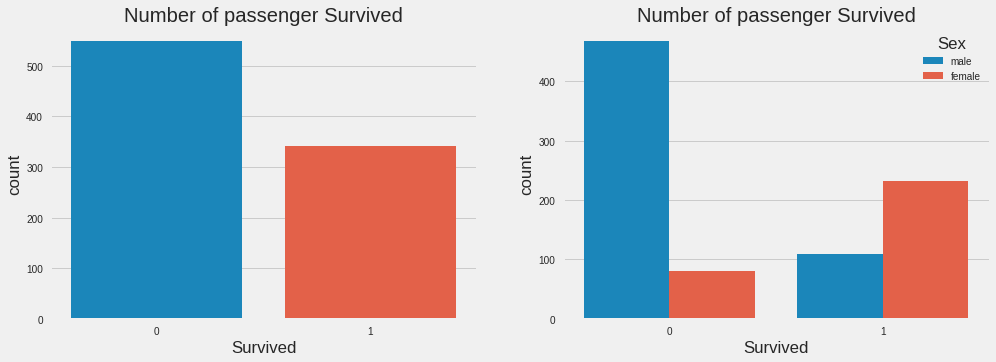

In [84]:
#looking at target feature 
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(train.Survived)
plt.title('Number of passenger Survived');

plt.subplot(1,2,2)
sns.countplot(x="Survived", hue="Sex", data=train)
plt.title('Number of passenger Survived');

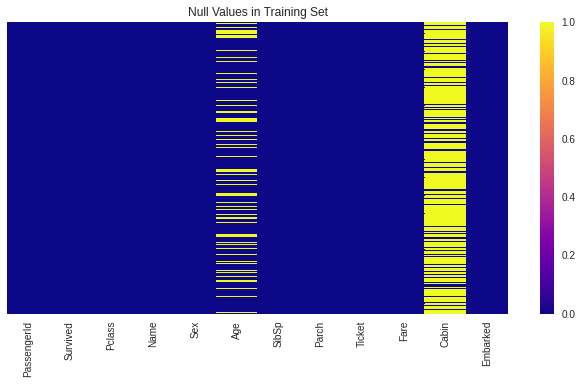

In [85]:
#realising null values on our training set
plt.style.use('seaborn')
plt.figure(figsize=(10,5))
sns.heatmap(train.isnull(), yticklabels = False, cmap='plasma')
plt.title('Null Values in Training Set');

We will be dealling with null values later on.

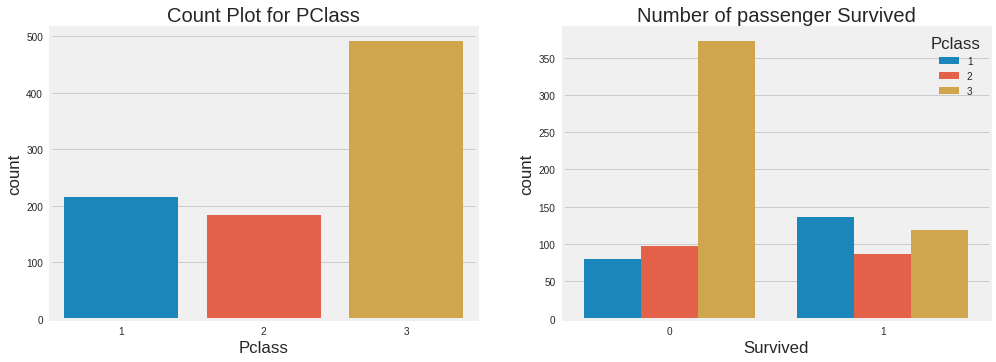

In [86]:
#Analysing Pclass
plt.figure(figsize=(15,5))
plt.style.use('fivethirtyeight')

plt.subplot(1,2,1)
sns.countplot(train['Pclass'])
plt.title('Count Plot for PClass');

plt.subplot(1,2,2)
sns.countplot(x="Survived", hue="Pclass", data=train)
plt.title('Number of passenger Survived');


In [87]:
pclass1 = train[train.Pclass == 1]['Survived'].value_counts(normalize=True).values[0]*100
pclass2 = train[train.Pclass == 2]['Survived'].value_counts(normalize=True).values[1]*100
pclass3 = train[train.Pclass == 3]['Survived'].value_counts(normalize=True).values[1]*100

print("View of some satistical data!\n")
print("Pclaas-1: {:.1f}% People Survived".format(pclass1))
print("Pclaas-2: {:.1f}% People Survived".format(pclass2))
print("Pclaas-3: {:.1f}% People Survived".format(pclass3))



View of some satistical data!

Pclaas-1: 63.0% People Survived
Pclaas-2: 47.3% People Survived
Pclaas-3: 24.2% People Survived


Pclass is also a good feature to train our model.
looking at the Age column


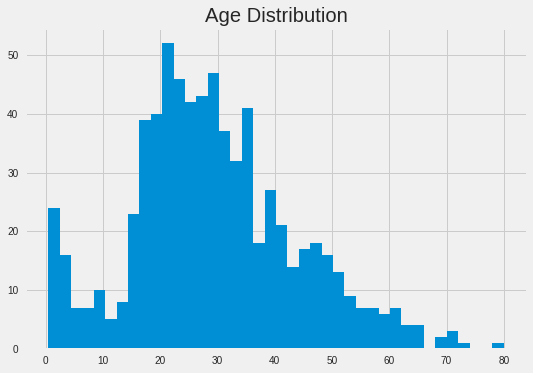

In [88]:
train['Age'].hist(bins=40)
plt.title('Age Distribution');

Age column has non-uniform data and many outliers

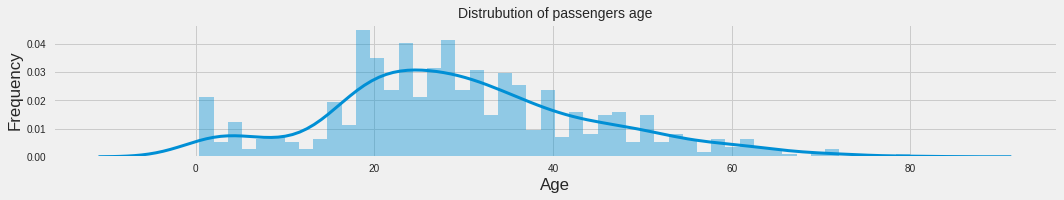

In [89]:
# set plot size
plt.figure(figsize=(15, 3))

# plot a univariate distribution of Age observations 
sns.distplot(train[(train["Age"] > 0)].Age, kde_kws={"lw": 3}, bins = 50)

# set titles and labels
plt.title('Distrubution of passengers age',fontsize= 14)
plt.xlabel('Age')
plt.ylabel('Frequency')
# clean layout
plt.tight_layout()

To visualize two age distributions, grouped by surviving status I am using boxlot and stripplot showed together:


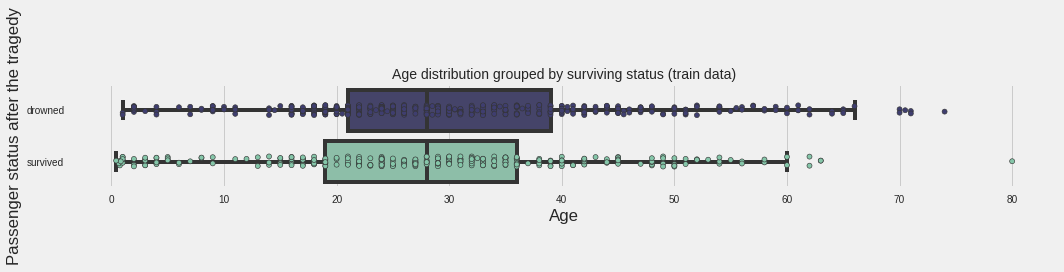

In [90]:
plt.figure(figsize=(15, 3))

# Draw a box plot to show Age distributions with respect to survival status.
sns.boxplot(y = 'Survived', x = 'Age', data = train,
     palette=["#3f3e6fd1", "#85c6a9"], fliersize = 0, orient = 'h')

# Add a scatterplot for each category.
sns.stripplot(y = 'Survived', x = 'Age', data = train,
     linewidth = 0.6, palette=["#3f3e6fd1", "#85c6a9"], orient = 'h')

plt.yticks( np.arange(2), ['drowned', 'survived'])
plt.title('Age distribution grouped by surviving status (train data)',fontsize= 14)
plt.ylabel('Passenger status after the tragedy')
plt.tight_layout()


looking at Number of siblings/spouses aboard

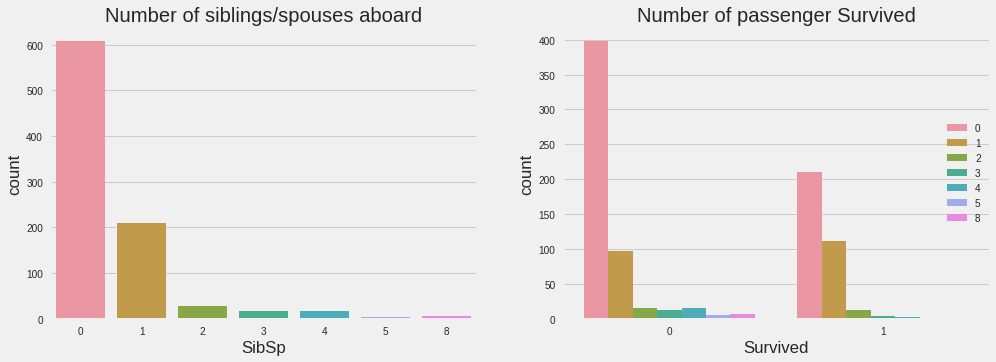

In [91]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(train['SibSp'])
plt.title('Number of siblings/spouses aboard');

plt.subplot(1,2,2)
sns.countplot(x="Survived", hue="SibSp", data=train)
plt.legend(loc='right')
plt.title('Number of passenger Survived');


Looks like single person Non-survived count is almost double than survived, while others have 50-50 % ratio


Now Looking at Port of embarkation

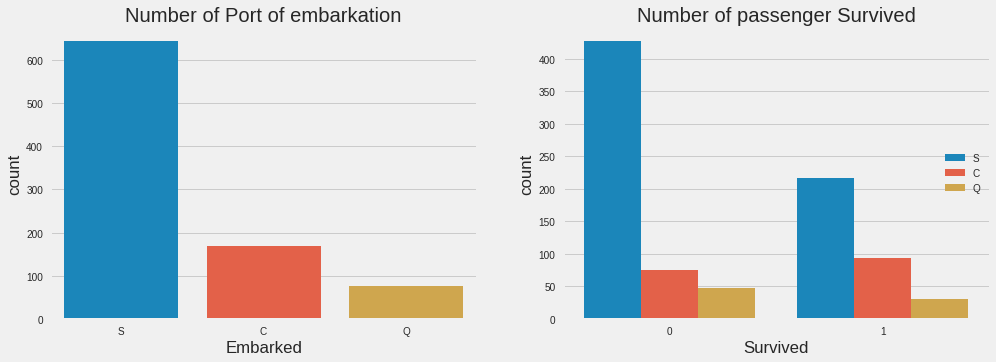

In [92]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(train['Embarked'])
plt.title('Number of Port of embarkation');

plt.subplot(1,2,2)
sns.countplot(x="Survived", hue="Embarked", data=train)
plt.legend(loc='right')
plt.title('Number of passenger Survived');

Can't say much!

Looking in to relationships among dataset

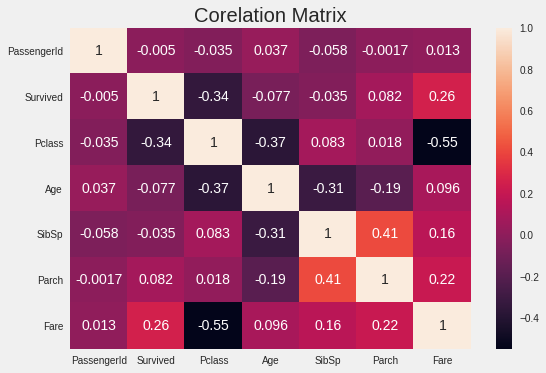

In [93]:
sns.heatmap(train.corr(), annot=True)
plt.title('Corelation Matrix');

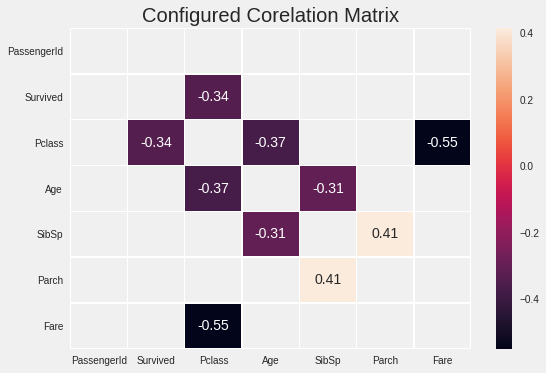

In [94]:
corr = train.corr()
sns.heatmap(corr[((corr >= 0.3) | (corr <= -0.3)) & (corr != 1)], annot=True, linewidths=.5, fmt= '.2f')
plt.title('Configured Corelation Matrix');


Fare vs Embarked

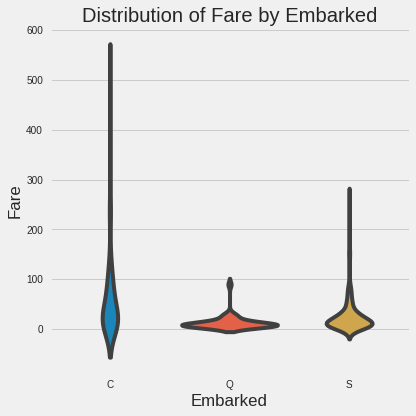

In [95]:
sns.catplot(x="Embarked", y="Fare", kind="violin", inner=None,
            data=train, height = 6, order = ['C', 'Q', 'S'])
plt.title('Distribution of Fare by Embarked')
plt.tight_layout()

The wider fare distribution among passengers who embarked in Cherbourg. It makes scence - many first-class passengers boarded the ship here, but the share of third-class passengers is quite significant.



The smallest variation in the price of passengers who boarded in q. Also, the average price of these passengers is the smallest, I think this is due to the fact that the path was supposed to be the shortest + almost all third-class passengers.


Fare vs Pclass

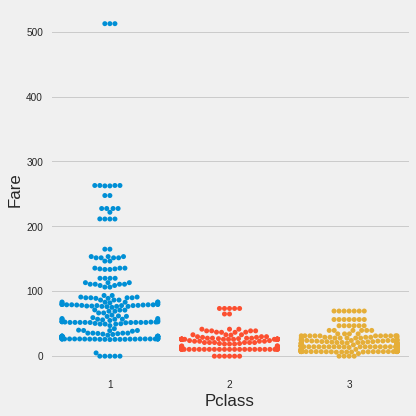

In [96]:
sns.catplot(x="Pclass", y="Fare", kind="swarm", data=train, height = 6)

plt.tight_layout()

We can observe that the distribution of prices for the second and third class is very similar. The distribution of first-class prices is very different, has a larger spread, and on average prices are higher.

Let's add colours to our points to indicate surviving status of passenger (there will be only data from training part of the dataset):

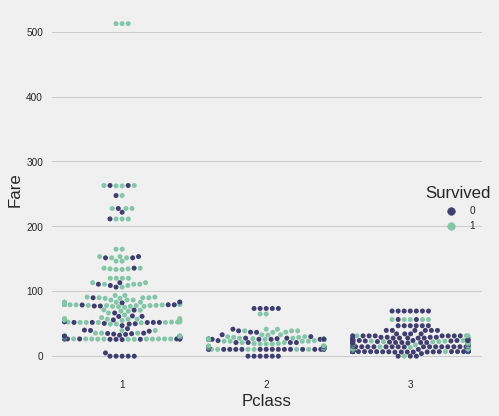

In [97]:
sns.catplot(x="Pclass", y="Fare",  hue = "Survived", kind="swarm", data=train, 
                                    palette=["#3f3e6fd1", "#85c6a9"], height = 6)
plt.tight_layout()

# Handling Missing Values

In [98]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [99]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

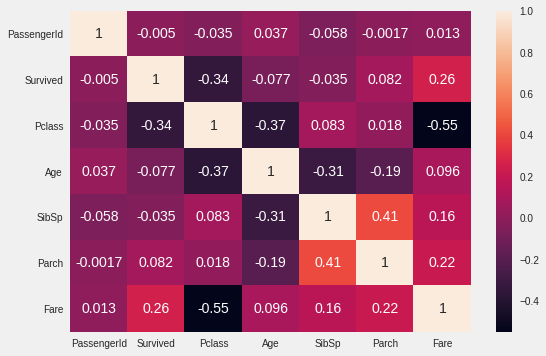

In [100]:
sns.heatmap(train.corr(), annot=True)

Pclass and age, as they had max relation in the entire set we are going to replace missing age values with median age calculated per class

In [101]:
train.loc[train.Age.isnull(), 'Age'] = train.groupby("Pclass").Age.transform('median')


#Same thing for test set
test.loc[test.Age.isnull(), 'Age'] = test.groupby("Pclass").Age.transform('median')

In [102]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

As maximum values in train set is S let's replace it with the null values

In [103]:
train['Embarked'] = train['Embarked'].fillna(mode(train['Embarked']))

#Applying the same technique for test set
test['Embarked'] = test['Embarked'].fillna(mode(test['Embarked']))


Also, corr(Fare, Pclass) is the highest correlation in absolute numbers for 'Fare', so using Pclass again to impute the missing values!

In [104]:
train['Fare']  = train.groupby("Pclass")['Fare'].transform(lambda x: x.fillna(x.median()))
test['Fare']  = test.groupby("Pclass")['Fare'].transform(lambda x: x.fillna(x.median()))

In [105]:
train.Cabin.value_counts()

C23 C25 C27    4
G6             4
B96 B98        4
F2             3
D              3
              ..
A19            1
B69            1
C103           1
B79            1
D49            1
Name: Cabin, Length: 147, dtype: int64

So many different values let's place missing values with U as "Unknown"

In [106]:
train['Cabin'] = train['Cabin'].fillna('U')
test['Cabin'] = test['Cabin'].fillna('U')

# Feature Engineering

In [107]:
train.Sex.unique()

array(['male', 'female'], dtype=object)

Sex is categorical data so we can replace male to 0 and femail to 1

In [108]:
train['Sex'][train['Sex'] == 'male'] = 0
train['Sex'][train['Sex'] == 'female'] = 1

test['Sex'][test['Sex'] == 'male'] = 0
test['Sex'][test['Sex'] == 'female'] = 1

In [109]:
train.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

Encoding with OneHotEncoder technique

In [110]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
temp = pd.DataFrame(encoder.fit_transform(train[['Embarked']]).toarray(), columns=['S', 'C', 'Q'])
train = train.join(temp)
train.drop(columns='Embarked', inplace=True)

temp = pd.DataFrame(encoder.transform(test[['Embarked']]).toarray(), columns=['S', 'C', 'Q'])
test = test.join(temp)
test.drop(columns='Embarked', inplace=True)

In [111]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'S', 'C', 'Q'],
      dtype='object')

In [112]:
train.Cabin.tolist()[0:20]

['U',
 'C85',
 'U',
 'C123',
 'U',
 'U',
 'E46',
 'U',
 'U',
 'U',
 'G6',
 'C103',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U']

We can get the alphabets by running regular expression

In [113]:
train['Cabin'] = train['Cabin'].map(lambda x:re.compile("([a-zA-Z])").search(x).group())
test['Cabin'] = test['Cabin'].map(lambda x:re.compile("([a-zA-Z])").search(x).group())

In [114]:
train.Cabin.unique()

array(['U', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [115]:
cabin_category = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'T':8, 'U':9}
train['Cabin'] = train['Cabin'].map(cabin_category)
test['Cabin'] = test['Cabin'].map(cabin_category)

Each passenger Name value contains the title of the passenger which can be extracted and discovered. To create new variable "Title":

* Using method 'split' by comma to divide Name in two parts and save the second part
* Splitting saved part by dot and save first part of the result
* To remove spaces around the title using 'split' method
* Visualizing, how many passengers hold each title,by using countplot.

In [116]:
train.Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [117]:
train['Name'] = train.Name.str.extract(' ([A-Za-z]+)\.', expand = False)
test['Name'] = test.Name.str.extract(' ([A-Za-z]+)\.', expand = False)

In [118]:
train['Name'].unique().tolist()

['Mr',
 'Mrs',
 'Miss',
 'Master',
 'Don',
 'Rev',
 'Dr',
 'Mme',
 'Ms',
 'Major',
 'Lady',
 'Sir',
 'Mlle',
 'Col',
 'Capt',
 'Countess',
 'Jonkheer']

That's lot's of title. So, bundling them

In [119]:
train.rename(columns={'Name' : 'Title'}, inplace=True)
train['Title'] = train['Title'].replace(['Rev', 'Dr', 'Col', 'Ms', 'Mlle', 'Major', 'Countess', 
                                       'Capt', 'Dona', 'Jonkheer', 'Lady', 'Sir', 'Mme', 'Don'], 'Other')
                                      
test.rename(columns={'Name' : 'Title'}, inplace=True)
test['Title'] = test['Title'].replace(['Rev', 'Dr', 'Col', 'Ms', 'Mlle', 'Major', 'Countess', 
                                       'Capt', 'Dona', 'Jonkheer', 'Lady', 'Sir', 'Mme', 'Don'], 'Other')

In [120]:
train['Title'].value_counts(normalize = True) * 100

Mr        58.024691
Miss      20.426487
Mrs       14.029181
Master     4.489338
Other      3.030303
Name: Title, dtype: float64

Converting to numeric

In [121]:
encoder = OneHotEncoder()
temp = pd.DataFrame(encoder.fit_transform(train[['Title']]).toarray())
train = train.join(temp)
train.drop(columns='Title', inplace=True)

temp = pd.DataFrame(encoder.transform(test[['Title']]).toarray())
test = test.join(temp)
test.drop(columns='Title', inplace=True)

But Sibsp is the number of siblings / spouses aboard the Titanic, and Parch is the number of parents / children aboard the Titanic. So, another straightforward feature to engineer is the size of each family aboard!

In [122]:
train['familySize'] = train['SibSp'] + train['Parch'] + 1
test['familySize'] = test['SibSp'] + test['Parch'] + 1

In [123]:
# Drop redundant features
train = train.drop(['SibSp', 'Parch', 'Ticket'], axis = 1)
test = test.drop(['SibSp', 'Parch', 'Ticket'], axis = 1)

In [124]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,S,C,Q,0,1,2,3,4,familySize
0,1,0,3,0,22.0,7.2500,9,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2
1,2,1,1,1,38.0,71.2833,3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2
2,3,1,3,1,26.0,7.9250,9,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1
3,4,1,1,1,35.0,53.1000,3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2
4,5,0,3,0,35.0,8.0500,9,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1


> Dateset is completely ready now!

In [125]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train.drop(['Survived', 'PassengerId'], axis=1), train['Survived'], test_size = 0.2, random_state=2)


# Linear Regression

Linear regression performs the task to predict a dependent variable value (y) based on a given independent variable (x). So, this regression technique finds out a linear relationship between x (input) and y(output). Hence, the name is Linear Regression.

In [126]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)

#R-Squared Score
print("R-Squared for Train set: {:.3f}".format(linreg.score(X_train, y_train)))
print("R-Squared for test set: {:.3f}" .format(linreg.score(X_test, y_test)))

R-Squared for Train set: 0.460
R-Squared for test set: 0.374


it's clear from the score that linear regression doesn't makes sence

# Logistic Regression

As our target variable is discrete value(i.e 0 and 1) logistic regression is more likely to fit well the model

In [127]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=10000, C=50)
logreg.fit(X_train, y_train)

#R-Squared Score
print("R-Squared for Train set: {:.3f}".format(logreg.score(X_train, y_train)))
print("R-Squared for test set: {:.3f}" .format(logreg.score(X_test, y_test)))

R-Squared for Train set: 0.848
R-Squared for test set: 0.804


****y-intercept and coefficients

In [128]:
print(logreg.intercept_)
print(logreg.coef_)

[2.42949177]
[[-1.03810742e+00  4.18191597e+00 -4.08395940e-02  2.80675528e-03
  -8.43953571e-02  7.83975911e-01  6.86991958e-01  4.68355222e-01
   3.32847449e+00 -1.34685647e+00 -9.62563422e-02 -8.68393066e-02
   1.40800717e-01 -4.79693005e-01]]


# MinMaxScaler

# Scaling data and re-training the model

In [129]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)

# we must apply the scaling to the test set that we computed for the training set
X_test_scaled = scaler.transform(X_test)

In [130]:
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train_scaled, y_train)

#R-Squared Score
print("R-Squared for Train set: {:.3f}".format(logreg.score(X_train_scaled, y_train)))
print("R-Squared for test set: {:.3f}" .format(logreg.score(X_test_scaled, y_test)))

R-Squared for Train set: 0.850
R-Squared for test set: 0.804


# KNN Classifier

K Nearest Neighbor(KNN) is a very simple, easy to understand, versatile and one of the topmost machine learning algorithms.KNN algorithm used for both classification and regression problems.

In [131]:
from sklearn.neighbors import KNeighborsClassifier

knnclf = KNeighborsClassifier(n_neighbors=7)

# Train the model using the training sets
knnclf.fit(X_train, y_train)
y_pred = knnclf.predict(X_test)

In [132]:
from sklearn.metrics import accuracy_score

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.7262569832402235


On scaled data

In [133]:
knnclf = KNeighborsClassifier(n_neighbors=7)

# Training the model using the scaled training sets
knnclf.fit(X_train_scaled, y_train)
y_pred = knnclf.predict(X_test_scaled)

In [134]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.7988826815642458


That increases the accuracy a lot!

# Support Vector Machine(SVM)


In [135]:
from sklearn.svm import LinearSVC

svmclf = LinearSVC(C=50)
svmclf.fit(X_train, y_train)

print('Accuracy of Linear SVC classifier on training set: {:.2f}'
     .format(svmclf.score(X_train, y_train)))
print('Accuracy of Linear SVC classifier on test set: {:.2f}'
     .format(svmclf.score(X_test, y_test)))


Accuracy of Linear SVC classifier on training set: 0.77
Accuracy of Linear SVC classifier on test set: 0.72


Trying on scaled data

In [136]:
svmclf = LinearSVC()
svmclf.fit(X_train_scaled, y_train)

print('Accuracy of Linear SVC classifier on training set: {:.2f}'
     .format(svmclf.score(X_train_scaled, y_train)))
print('Accuracy of Linear SVC classifier on test set: {:.2f}'
     .format(svmclf.score(X_test_scaled, y_test)))

Accuracy of Linear SVC classifier on training set: 0.85
Accuracy of Linear SVC classifier on test set: 0.80


# Kernelize SVM


Support Vector Machine with RBF kernel¶

In [137]:
from sklearn.svm import SVC

svcclf = SVC(gamma=0.1)
svcclf.fit(X_train, y_train)

print('Accuracy of Linear SVC classifier on training set: {:.2f}'
     .format(svcclf.score(X_train, y_train)))
print('Accuracy of Linear SVC classifier on test set: {:.2f}'
     .format(svcclf.score(X_test, y_test)))

Accuracy of Linear SVC classifier on training set: 0.93
Accuracy of Linear SVC classifier on test set: 0.70


In [138]:
svcclf = SVC(gamma=50)
svcclf.fit(X_train_scaled, y_train)

print('Accuracy of Linear SVC classifier on training set: {:.2f}'
     .format(svcclf.score(X_train_scaled, y_train)))
print('Accuracy of Linear SVC classifier on test set: {:.2f}'
     .format(svcclf.score(X_test_scaled, y_test)))


Accuracy of Linear SVC classifier on training set: 0.91
Accuracy of Linear SVC classifier on test set: 0.79


# Decision Tree

In [139]:
from sklearn.tree import DecisionTreeClassifier

dtclf = DecisionTreeClassifier(max_depth = 3).fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(dtclf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(dtclf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.83
Accuracy of Decision Tree classifier on test set: 0.79


# Random Forest
Random Forest is an ensembling learning algorithm which combines decision trees in order to increase performance and avoid overfitting.

In [140]:
from sklearn.ensemble import RandomForestClassifier
rfclf = RandomForestClassifier(random_state=2)

# Hyperparameter Tuning¶

Below we set the hyperparameter grid of values with 4 lists of values:

*  'criterion' : A function which measures the quality of a split.
*  'n_estimators' : The number of trees of our random forest.
* 'max_features' : The number of features to choose when looking for the best way of splitting.
* 'max_depth' : the maximum depth of a decision tree.

In [141]:
# Set our parameter grid
param_grid = { 
    'criterion' : ['gini', 'entropy'],
    'n_estimators': [100, 300, 500],
    'max_features': ['auto', 'log2'],
    'max_depth' : [3, 5, 7]    
}

In [142]:
from sklearn.model_selection import GridSearchCV

randomForest_CV = GridSearchCV(estimator = rfclf, param_grid = param_grid, cv = 5)
randomForest_CV.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=2),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [100, 300, 500]})

Printing the optimal hyperparameters set

In [143]:
randomForest_CV.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'auto',
 'n_estimators': 100}

In [144]:
rf_clf = RandomForestClassifier(random_state = 2, criterion = 'gini', max_depth = 7, max_features = 'auto', n_estimators = 100)

rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, random_state=2)

In [145]:
predictions = rf_clf.predict(X_test)

In [146]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, predictions) * 100

78.77094972067039

# All model Accuracy Score

In [147]:
#Linear Model
print("Linear Model R-Squared for Train set: {:.3f}".format(linreg.score(X_train, y_train)))
print("Linear Model R-Squared for test set: {:.3f}" .format(linreg.score(X_test, y_test)))
print()

#Logistic Regression
print("Logistic Regression R-Squared for Train set: {:.3f}".format(logreg.score(X_train_scaled, y_train)))
print("Logistic Regression R-Squared for test set: {:.3f}" .format(logreg.score(X_test_scaled, y_test)))
print()

#KNN Classifier
print("KNN Classifier Accuracy:",accuracy_score(y_test, y_pred))
print()

#SVM
print('SVM Accuracy on training set: {:.2f}'
     .format(svmclf.score(X_train_scaled, y_train)))
print('SVM Accuracy on test set: {:.2f}'
     .format(svmclf.score(X_test_scaled, y_test)))
print()

#Kerelize SVM
print('SVC Accuracy on training set: {:.2f}'
     .format(svcclf.score(X_train_scaled, y_train)))
print('Accuracy on test set: {:.2f}'
     .format(svcclf.score(X_test_scaled, y_test)))
print()

#Decision Tree
print('Accuracy of Decision Tree on training set: {:.2f}'
     .format(dtclf.score(X_train, y_train)))
print('Accuracy of Decision Tree on test set: {:.2f}'
     .format(dtclf.score(X_test, y_test)))
print()

#Random Forest
print('Random Forest Accuracy:{:.3f}'.format(accuracy_score(y_test, predictions) * 100))

Linear Model R-Squared for Train set: 0.460
Linear Model R-Squared for test set: 0.374

Logistic Regression R-Squared for Train set: 0.850
Logistic Regression R-Squared for test set: 0.804

KNN Classifier Accuracy: 0.7988826815642458

SVM Accuracy on training set: 0.85
SVM Accuracy on test set: 0.80

SVC Accuracy on training set: 0.91
Accuracy on test set: 0.79

Accuracy of Decision Tree on training set: 0.83
Accuracy of Decision Tree on test set: 0.79

Random Forest Accuracy:78.771


# Submitting the solutions
SVC Model

In [148]:
scaler = MinMaxScaler()

train_conv = scaler.fit_transform(train.drop(['Survived', 'PassengerId'], axis=1))
test_conv = scaler.transform(test.drop(['PassengerId'], axis = 1))


In [149]:
svcclf = SVC(gamma=50)
svcclf.fit(train_conv, train['Survived'])

SVC(gamma=50)

In [150]:
test['Survived'] = svcclf.predict(test_conv)

In [151]:
test[['PassengerId', 'Survived']].to_csv('MySubmission1.csv', index = False)